In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pwd

'C:\\Users\\YUHA\\Desktop\\DScover\\사회2조 final project'

In [3]:
df=pd.read_csv('data/성매매광고트윗_데이터셋.csv', encoding='CP949', low_memory=False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257084 entries, 0 to 257083
Data columns (total 33 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              257084 non-null  int64  
 1   id                 257084 non-null  float64
 2   conversation_id    257084 non-null  float64
 3   created_at         257084 non-null  object 
 4   date               257084 non-null  object 
 5   time               257084 non-null  object 
 6   user_id            257084 non-null  float64
 7   username           257084 non-null  object 
 8   name               257084 non-null  object 
 9   tweet              257084 non-null  object 
 10  language           257084 non-null  object 
 11  mentions           257084 non-null  object 
 12  urls               257084 non-null  object 
 13  photos             257084 non-null  object 
 14  replies_count      257084 non-null  int64  
 15  retweets_count     257084 non-null  int64  
 16  li

### 이상치 처리

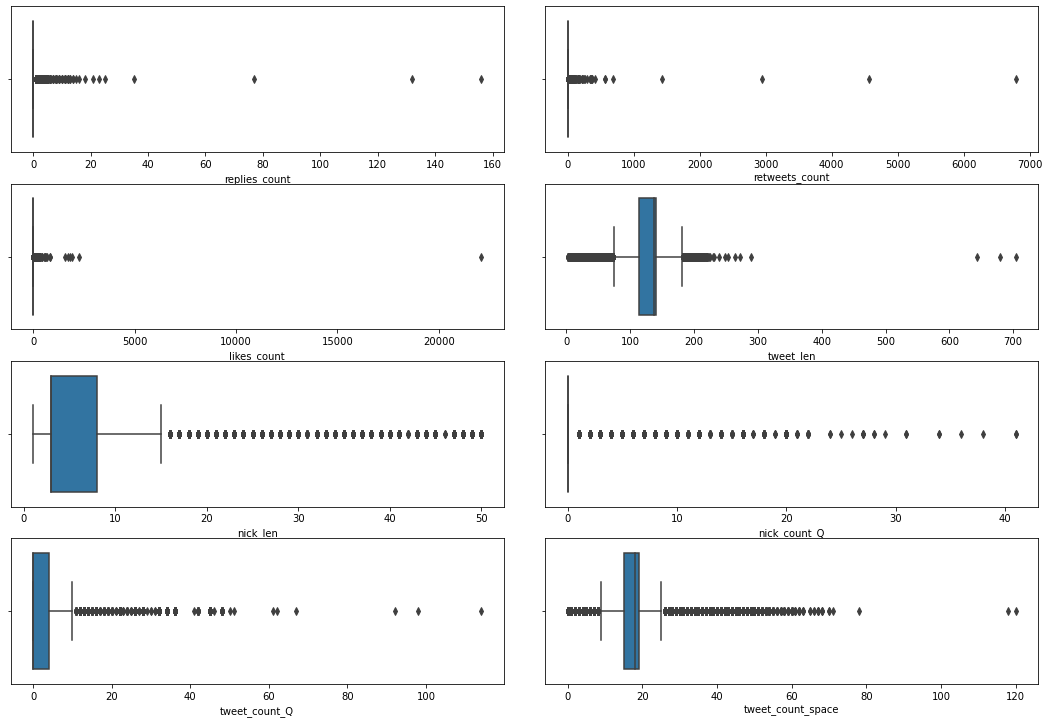

In [6]:
fig, axis = plt.subplots(4, 2, figsize = (15,10))
plt.tight_layout()

#int형인 열들(int이고 boolean인 열은 제외)
ax1 = sns.boxplot(x='replies_count',data=df, ax=axis[0,0])
ax2 = sns.boxplot(x='retweets_count',data=df, ax=axis[0,1])
ax3 = sns.boxplot(x='likes_count',data=df, ax=axis[1,0])
ax4 = sns.boxplot(x='tweet_len',data=df, ax=axis[1,1])
ax5 = sns.boxplot(x='nick_len',data=df, ax=axis[2,0])
ax6 = sns.boxplot(x='nick_count_Q',data=df, ax=axis[2,1])
ax7 = sns.boxplot(x='tweet_count_Q',data=df, ax=axis[3,0])
ax8 = sns.boxplot(x='tweet_count_space',data=df, ax=axis[3,1])

In [93]:
#Z-score의 절대값이 3 이상인 행을 가져오는 함수
def get_outlier(df=None, column=None):
    threshold = 3
    
    mean = np.mean(df[column])
    std = np.std(df[column])
    
    z_score = [(y-mean)/std for y in df[column]]
    
    masks = np.where(np.abs(z_score)>threshold)
    return masks

In [8]:
#삭제할 행 가져오기
col = ['replies_count','retweets_count','likes_count','tweet_len','nick_len','nick_count_Q','tweet_count_Q','tweet_count_space']
list = []
for c in col:
    a = get_outlier(df=df, column=c)
    if a is not None:
        list.append(a)

In [11]:
#3차원 리스트를 1차원 리스트로 만들기
list = [element for array in list for element in array]
list = [element for array in list for element in array]

In [12]:
len(list)

43169

In [13]:
list=set(list) #중복값 제거
len(list)

30478

In [14]:
df.drop(list, inplace=True, axis=0) #이상치 제거

### 검색어 열 값 수정

In [15]:
index=df[df.search_word=='성매매광고트윗_트렌드'].index

In [16]:
trend=['더블헤더', '미세먼지', '보건실침대', '수업시간몰폰', '어버이날', '피어리스', '허벅지씨름', '호흡곤란']

In [17]:
#트렌드 키워드가 본문(트윗) 내에 있으면 검색어 열 값을 해당 키워드로 수정
for i in index:
    for t in trend:
        if (df['tweet'][i].find(t) != -1): #지정한 문자를 찾지 못한 경우 -1 반환(찾으면 인덱스 반환)
            df['search_word'][i]=t
            break

<ipython-input-17-adce5eebefd1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['search_word'][i]=t


In [24]:
pd.set_option('display.max_colwidth', None) #열 너비 제한 없애기
df[df.search_word=='성매매광고트윗_트렌드'].tweet #트렌드 키워드가 트윗에 포함되지 않은 경우

247744    순서대로 남준 윤기 석진 호석 지민 태형 정국 (공식표기)같은데 창문 모양은 별 상관 없는 거겠지?? 근데 그림들이 너무 실명제다ㅋㅋㅋㅋㅋㅋ 윤기 피아노라니 나 설레도 되는 부분이지..  https://t.co/ASFwQFFAuw
Name: tweet, dtype: object

In [25]:
df.drop(247744, inplace=True)

In [31]:
df.drop(['index'], inplace=True, axis=1)

In [36]:
df.to_csv('data/dataset.csv', index=False, encoding='CP949')

## 0610 데이터 합치기

In [6]:
#기존에 사용하던 파일(검색어를 기준으로 크롤)
df=pd.read_csv('data/dataset.csv', encoding='CP949', low_memory=False)

In [7]:
#추가로 크롤링한 파일(계정을 기준으로 크롤)
df2=pd.read_csv('data/계정크롤링(전처리-일반,타광고삭제) (계정정보,타임라인 트윗 모두 포함).csv', encoding='CP949', low_memory=False)

In [62]:
#df에만 있는 열
a=df.columns.tolist()
b=df2.columns.tolist()

for i in b:
    if i in a:
        a.remove(i)
a

['reply_to']

In [63]:
#df2에만 있는 열
a=df.columns.tolist()
b=df2.columns.tolist()

for i in a:
    if i in b:
        b.remove(i)
b

['Unnamed: 0',
 'retweet_user_id',
 'retweet_username',
 'retweet_id',
 'retweet_date',
 'tweet_type',
 'account_create_date',
 'description',
 'follwers_count',
 'followings_count',
 'tweets_count',
 'media_count',
 'favourites_count',
 'media_ratio']

In [70]:
df.drop('reply_to', axis=1, inplace=True)

In [71]:
df2.drop(['Unnamed: 0',
 'retweet_user_id',
 'retweet_username',
 'retweet_id',
 'retweet_date',
 'tweet_type',
 'account_create_date',
 'description',
 'follwers_count',
 'followings_count',
 'tweets_count',
 'media_count',
 'favourites_count',
 'media_ratio'], axis=1, inplace=True)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226605 entries, 0 to 226604
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 226605 non-null  float64
 1   conversation_id    226605 non-null  float64
 2   created_at         226605 non-null  object 
 3   date               226605 non-null  object 
 4   time               226605 non-null  object 
 5   user_id            226605 non-null  float64
 6   username           226605 non-null  object 
 7   name               226605 non-null  object 
 8   tweet              226605 non-null  object 
 9   language           226605 non-null  object 
 10  mentions           226605 non-null  object 
 11  urls               226605 non-null  object 
 12  photos             226605 non-null  object 
 13  replies_count      226605 non-null  int64  
 14  retweets_count     226605 non-null  int64  
 15  likes_count        226605 non-null  int64  
 16  ha

In [72]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6074 entries, 0 to 6073
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2724 non-null   float64
 1   conversation_id    2724 non-null   float64
 2   created_at         2724 non-null   object 
 3   date               2724 non-null   object 
 4   time               2724 non-null   object 
 5   tweet              2724 non-null   object 
 6   language           2724 non-null   object 
 7   mentions           2724 non-null   object 
 8   urls               2724 non-null   object 
 9   photos             2724 non-null   object 
 10  replies_count      2724 non-null   float64
 11  retweets_count     2724 non-null   float64
 12  likes_count        2724 non-null   float64
 13  hashtags           2724 non-null   object 
 14  link               2724 non-null   object 
 15  quote_url          1 non-null      object 
 16  video              2724 

In [74]:
#3350개의 행이 모든 열에서 null값이므로 삭제
df2[df2.id.isnull()]

,id,conversation_id,created_at,date,time,tweet,language,mentions,urls,photos,...,space_div_len,last_word,search_word,noun_div_pos,y,user_id,username,name,nick_len,nick_count_Q
2724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
df2.drop(df2[df2.id.isnull()].index, inplace=True)

In [80]:
#null값 처리
df2['quote_url']=df2['quote_url'].fillna('[]')

In [82]:
#데이터 타입 정리
df2[['replies_count','retweets_count','likes_count','tweet_len','tweet_count_Q','tweet_count_space','y','nick_len','nick_count_Q']]=df2[['replies_count','retweets_count','likes_count','tweet_len','tweet_count_Q','tweet_count_space','y','nick_len','nick_count_Q']].astype(int)

In [85]:
#데이터 프레임 합치기
df3=pd.concat([df,df2])

In [86]:
#인덱스 재설정
df3.reset_index(drop=True, inplace=True)

In [118]:
#이상치 처리
#위의 Z-score를 사용한 함수 get_outlier을 사용하여 이상치 행을 얻음
col = ['replies_count','retweets_count','likes_count','tweet_len','nick_len','nick_count_Q','tweet_count_Q','tweet_count_space']
list = []
for c in col:
    a = get_outlier(df=df3, column=c)
    if a is not None:
        list.append(a)

In [119]:
#3차원 리스트 1차원으로 만들기
list = [element for array in list for element in array]
list = [element for array in list for element in array]

In [120]:
len(list)

19657

In [121]:
list=set(list) #중복값 제거
len(list)

16045

In [123]:
#이상치 행 삭제
df3.drop(list, inplace=True, axis=0)

In [124]:
df3.reset_index(drop=True, inplace=True) #인덱스 재설정
df3.to_csv('data/dataset2.csv', index=False, encoding='CP949')

In [125]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213284 entries, 0 to 213283
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 213284 non-null  float64
 1   conversation_id    213284 non-null  float64
 2   created_at         213284 non-null  object 
 3   date               213284 non-null  object 
 4   time               213284 non-null  object 
 5   user_id            213284 non-null  float64
 6   username           213284 non-null  object 
 7   name               213284 non-null  object 
 8   tweet              213284 non-null  object 
 9   language           213284 non-null  object 
 10  mentions           213284 non-null  object 
 11  urls               213284 non-null  object 
 12  photos             213284 non-null  object 
 13  replies_count      213284 non-null  int64  
 14  retweets_count     213284 non-null  int64  
 15  likes_count        213284 non-null  int64  
 16  ha